<a href="https://colab.research.google.com/github/DarthCoder501/ML-AI-Projects/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 23.6MB/s]
100% 149M/149M [00:07<00:00, 20.4MB/s]


In [4]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [5]:
tr_df = get_class_paths('/content/Training')

In [6]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [7]:
ts_df = get_class_paths('/content/Testing')

In [8]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


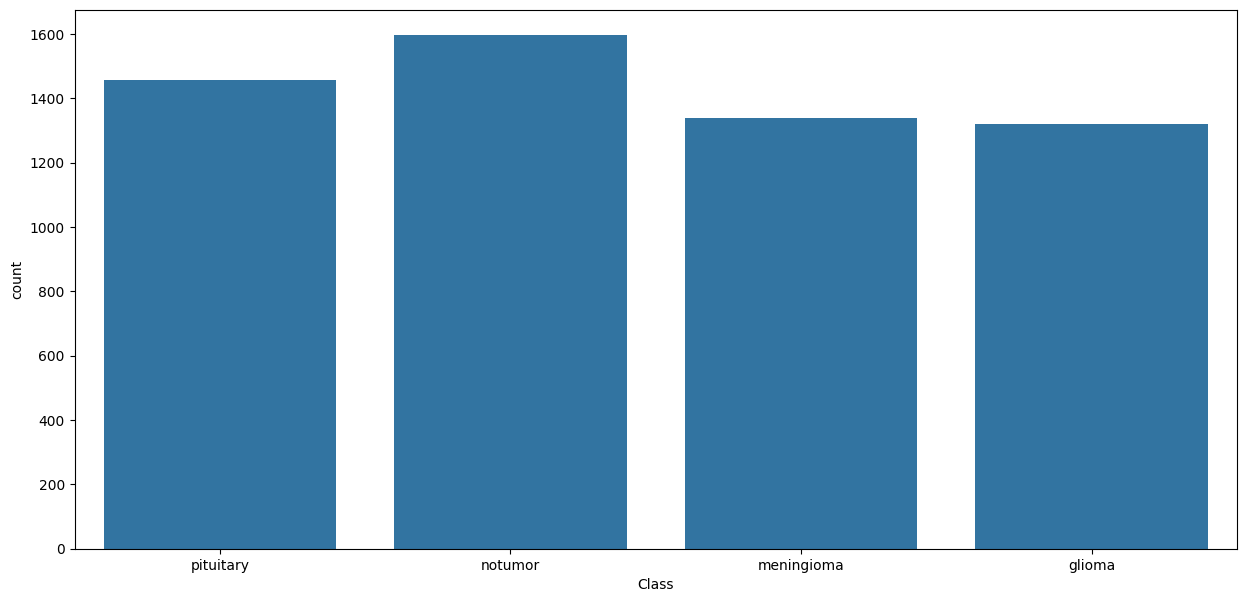

In [9]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df["Class"])

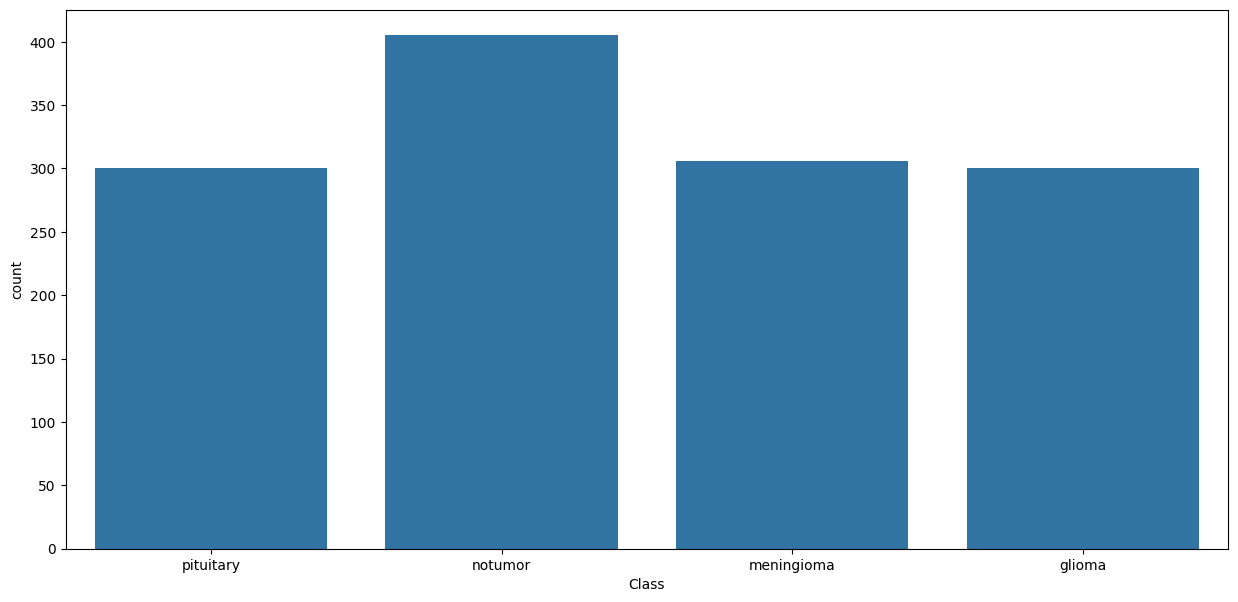

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df["Class"])

In [11]:
!pip install tensorflow

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [14]:
valid_df

,Class Path,Class
68,/content/Testing/pituitary/Te-pi_0143.jpg,pituitary
505,/content/Testing/notumor/Te-no_0028.jpg,notumor
296,/content/Testing/pituitary/Te-pi_0282.jpg,pituitary
14,/content/Testing/pituitary/Te-pi_0022.jpg,pituitary
541,/content/Testing/notumor/Te-no_0372.jpg,notumor
...,...,...
1291,/content/Testing/glioma/Te-gl_0299.jpg,glioma
278,/content/Testing/pituitary/Te-pi_0056.jpg,pituitary
726,/content/Testing/meningioma/Te-me_0258.jpg,meningioma
100,/content/Testing/pituitary/Te-pi_0117.jpg,pituitary


In [15]:
ts_df

,Class Path,Class
309,/content/Testing/notumor/Te-no_0350.jpg,notumor
679,/content/Testing/notumor/Te-no_0298.jpg,notumor
907,/content/Testing/meningioma/Te-me_0080.jpg,meningioma
338,/content/Testing/notumor/Te-no_0020.jpg,notumor
339,/content/Testing/notumor/Te-no_0073.jpg,notumor
...,...,...
416,/content/Testing/notumor/Te-no_0161.jpg,notumor
1104,/content/Testing/glioma/Te-gl_0065.jpg,glioma
640,/content/Testing/notumor/Te-no_0288.jpg,notumor
592,/content/Testing/notumor/Te-noTr_0003.jpg,notumor


In [16]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_datagen = ImageDataGenerator(rescale=1/255)

In [17]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

ts_gen = ts_datagen.flow_from_dataframe(ts_df, x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

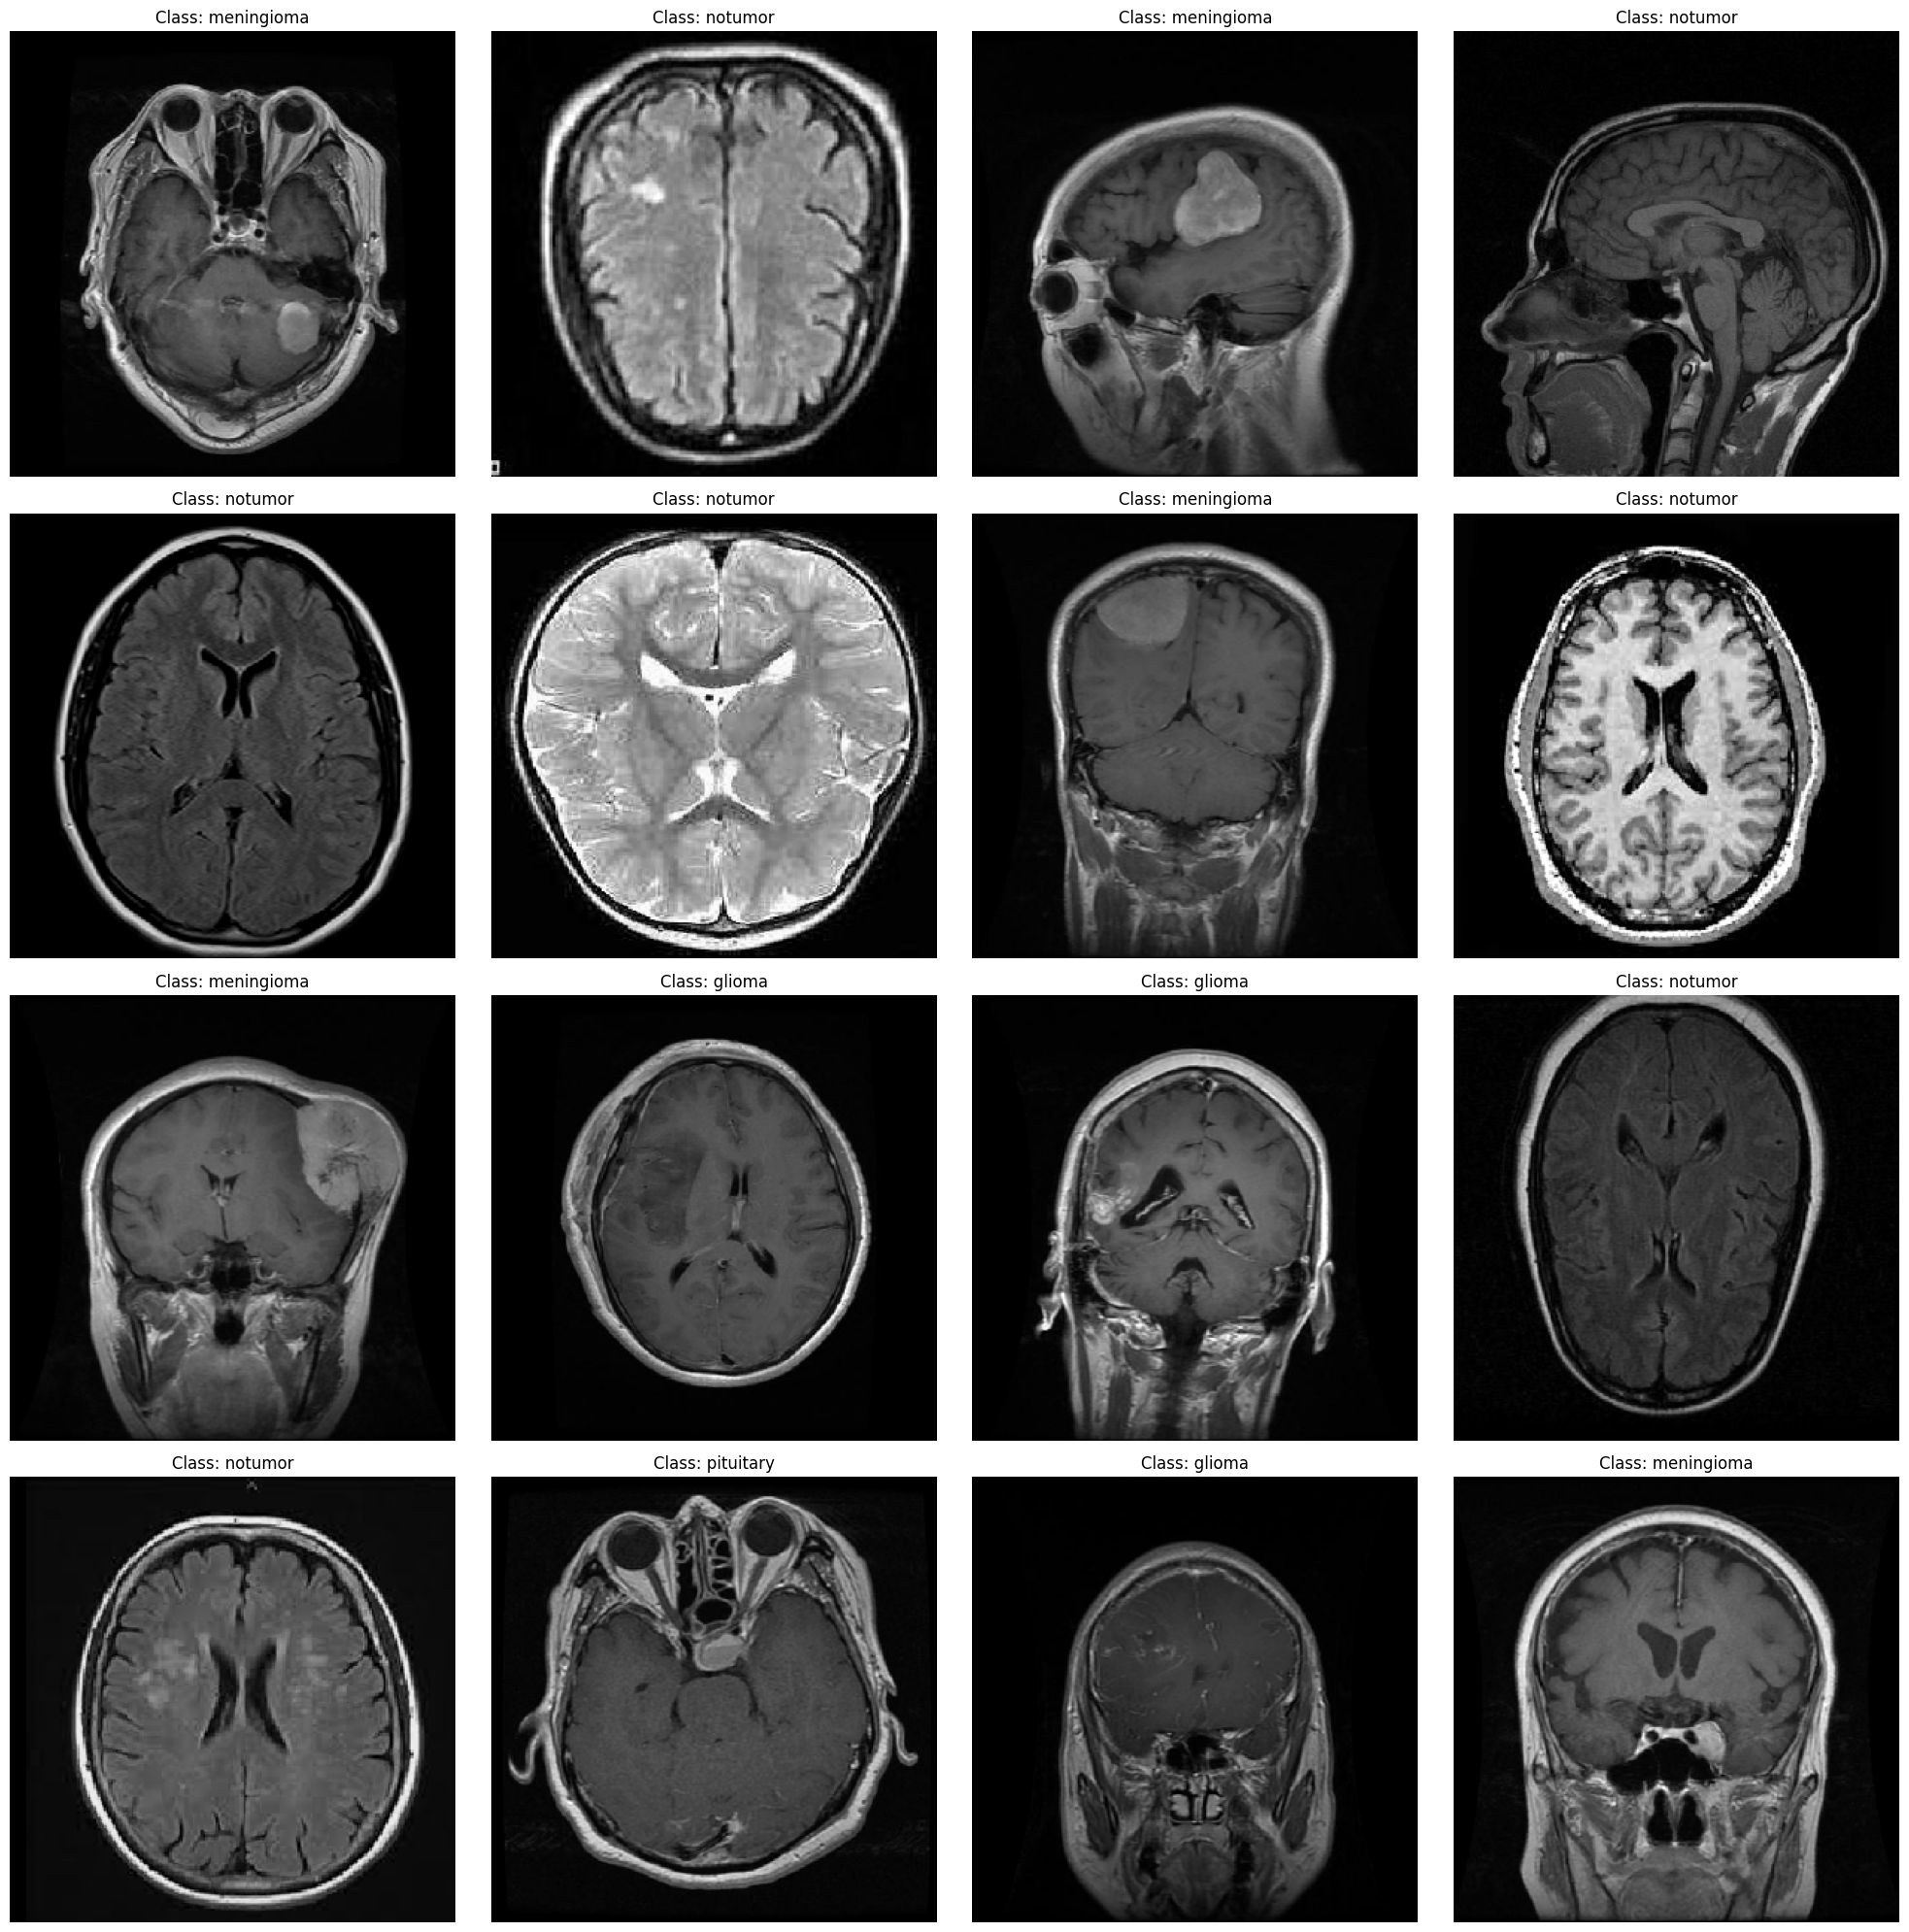

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get a list of the class names and indicies
  class_name = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_name[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show

In [19]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation='relu'),
    Dropout(rate = 0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [20]:
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Recall(), Precision()])

In [21]:
hist = model.fit(tr_gen, validation_data=valid_gen, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.7194 - loss: 0.7559 - precision: 0.8149 - recall: 0.6038 - val_accuracy: 0.9557 - val_loss: 0.1130 - val_precision: 0.9601 - val_recall: 0.9542
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 769ms/step - accuracy: 0.9767 - loss: 0.0774 - precision: 0.9802 - recall: 0.9752 - val_accuracy: 0.9649 - val_loss: 0.1128 - val_precision: 0.9691 - val_recall: 0.9588
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 769ms/step - accuracy: 0.9902 - loss: 0.0328 - precision: 0.9909 - recall: 0.9896 - val_accuracy: 0.9817 - val_loss: 0.0670 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 778ms/step - accuracy: 0.9926 - loss: 0.0189 - precision: 0.9932 - recall: 0.9924 - val_accuracy: 0.9908 - val_loss: 0.0412 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 775ms/step - accuracy: 0.9942 - loss: 0.0190 - precision: 0.9945 - recall: 0.9942 - val_accuracy: 0.9908 - val_loss: 

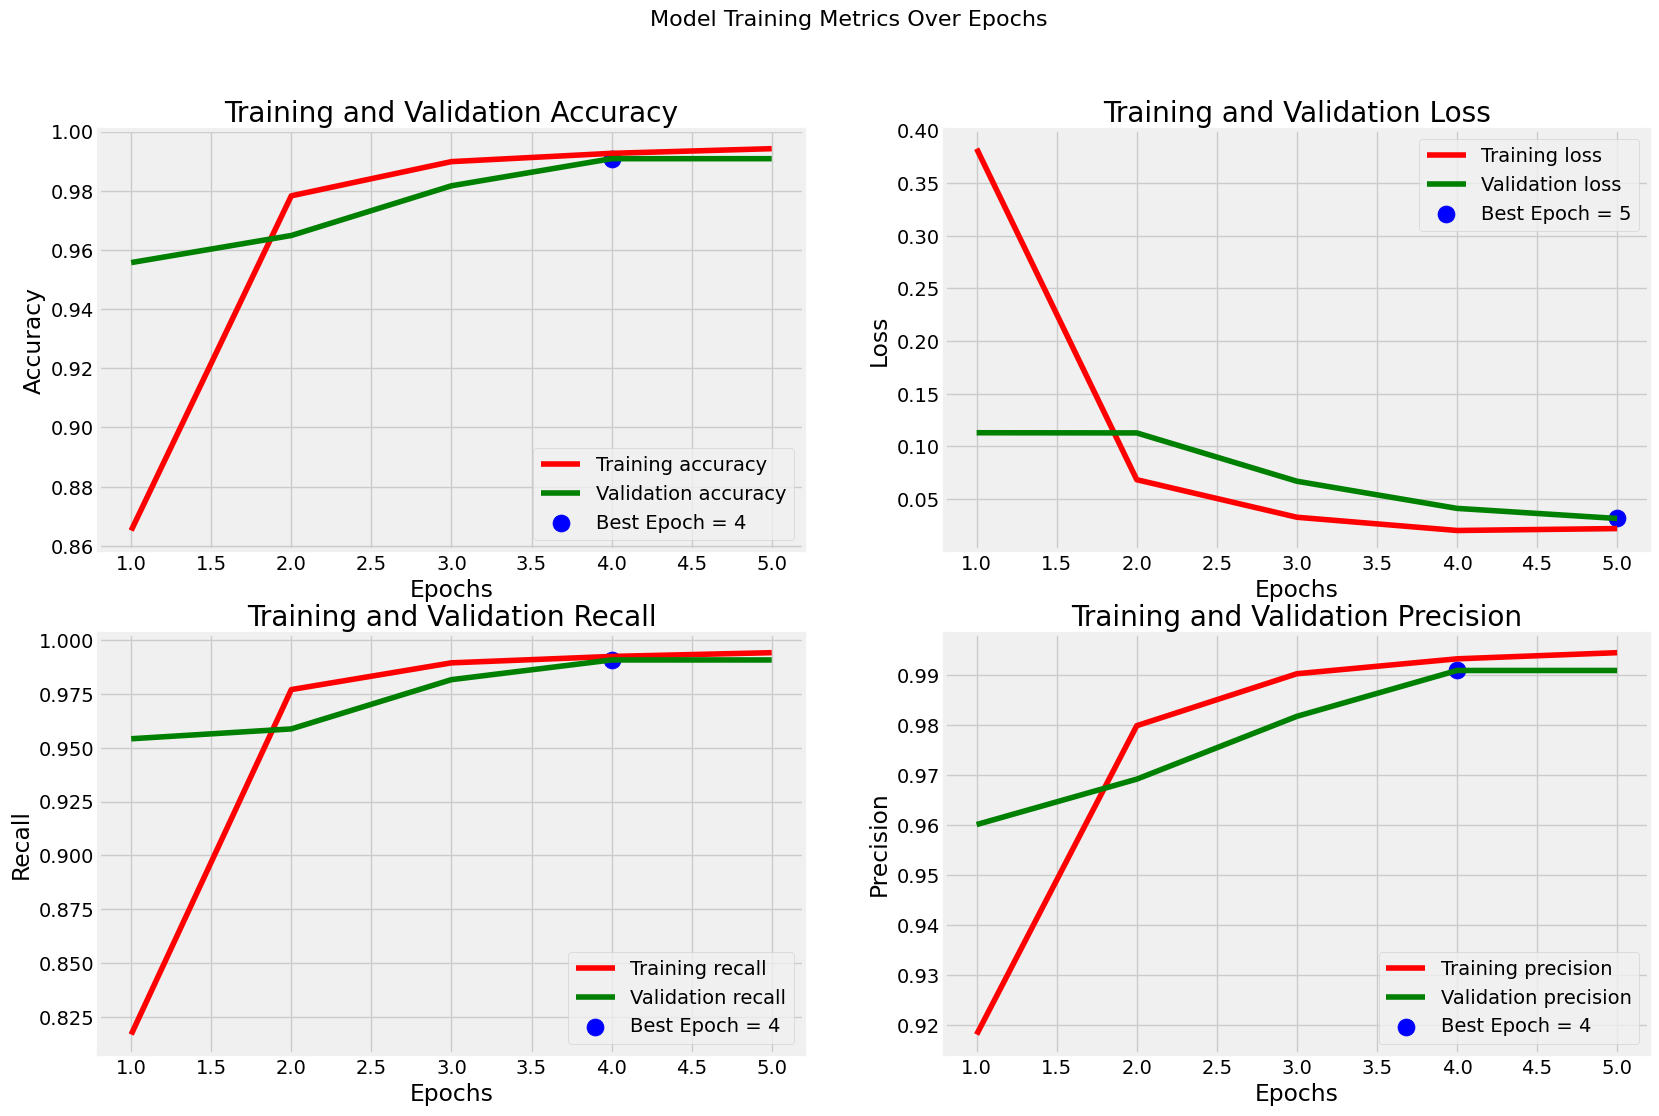

In [22]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'recall', 'precision']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [23]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'Training Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}')
print(f'Test Loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 312ms/step - accuracy: 0.9982 - loss: 0.0041 - precision: 0.9982 - recall: 0.9980
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9931 - loss: 0.0178 - precision: 0.9931 - recall: 0.9931


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9965 - loss: 0.0161 - precision: 0.9965 - recall: 0.9965
Training Accuracy: 99.84%
Train Loss: 0.0046


Validation Accuracy: 98.93
Validation Loss: 0.0342


Test Accuracy: 99.39
Test Loss: 0.0312


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step


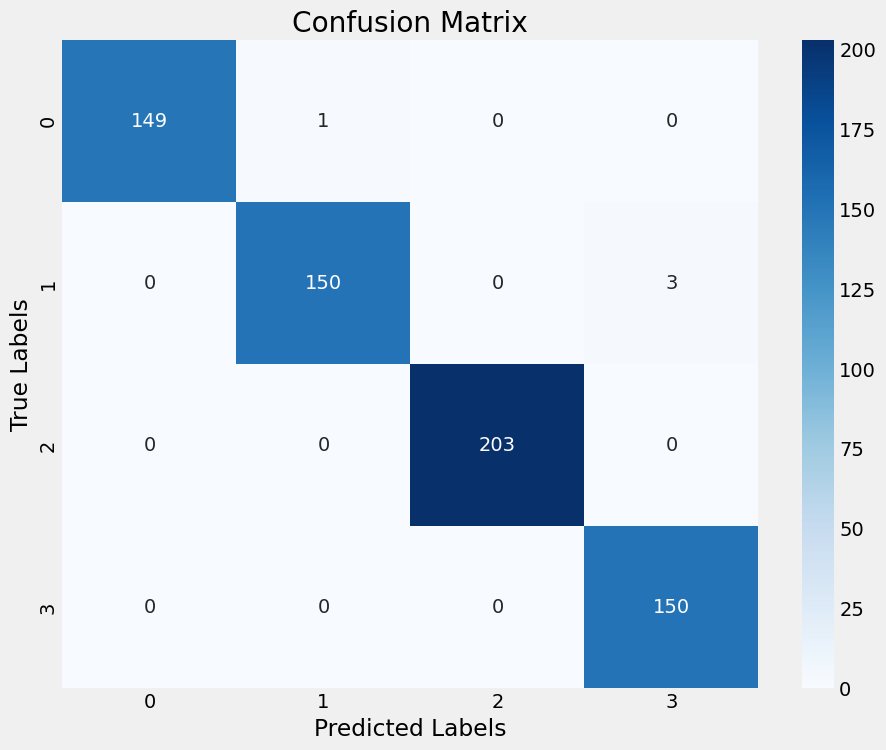

In [24]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from PIL import Image

def predict(img_path: str):
  # Get class labels
  labels = list(class_dict.keys())

  # Crate figure
  plt.figure(figsize=(10, 10))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

  # Plot prediction probailities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize = 15)
  plt.title('Class Probabilities')

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f'\nPredicted tumor type: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


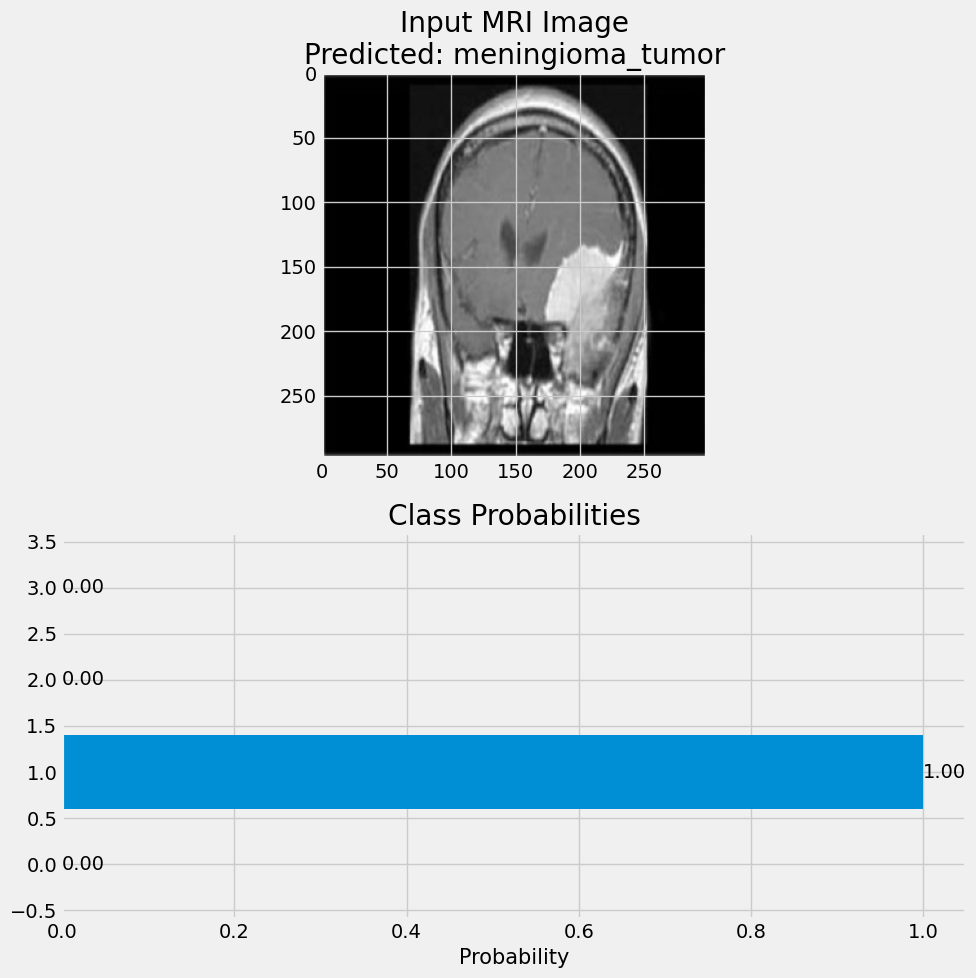


Predicted tumor type: meningioma_tumor


In [26]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


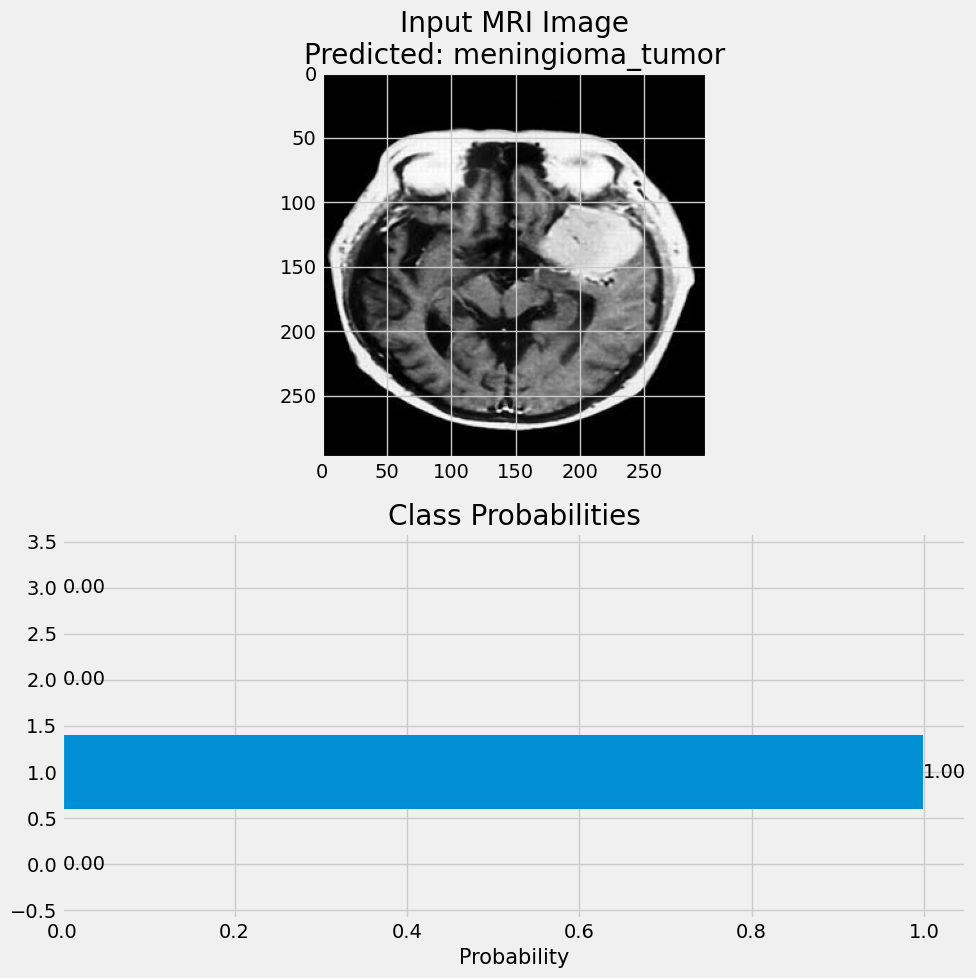


Predicted tumor type: meningioma_tumor


In [27]:
predict('/content/Testing/meningioma/Te-meTr_0005.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


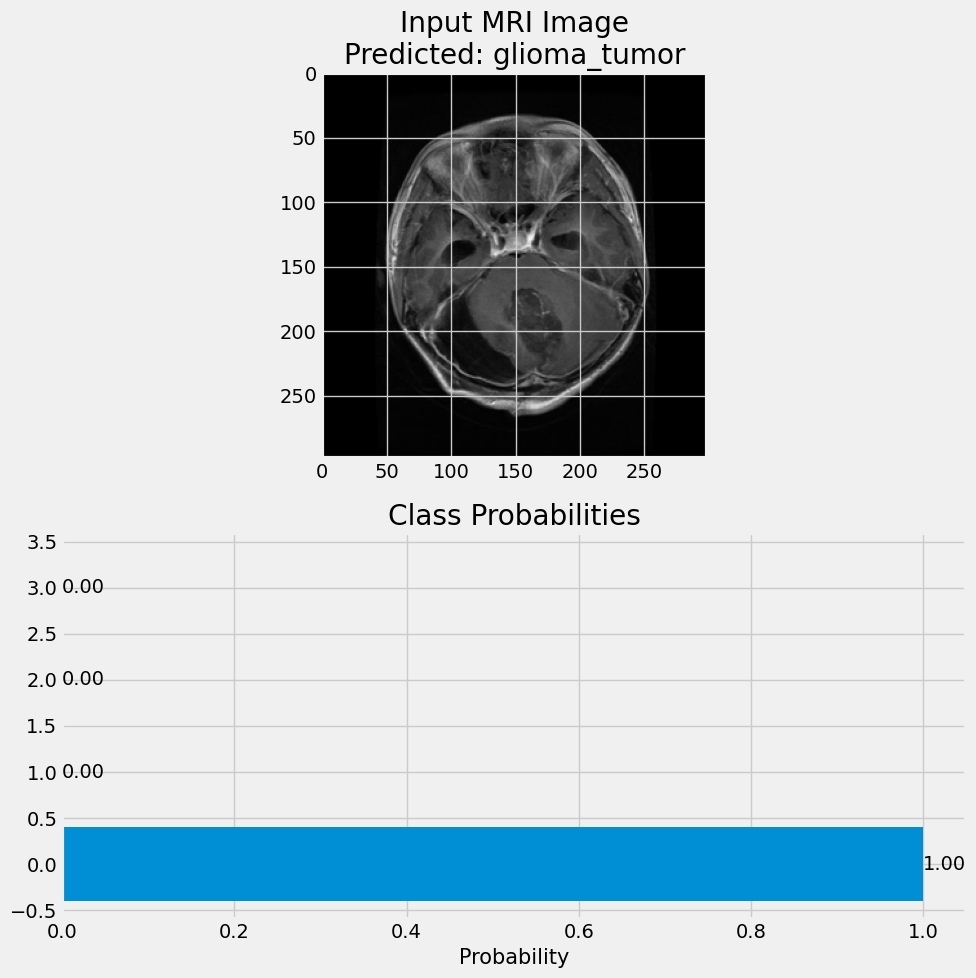


Predicted tumor type: glioma_tumor


In [28]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [29]:
model.save_weights('xception_model.weights.h5')

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [31]:
batch_size = 16

img_size = (224,224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_datagen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

ts_gen = ts_datagen.flow_from_dataframe(ts_df, x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [32]:
# Create a Sequential model

cnn_model = Sequential()

# Add convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Recall(), Precision()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = cnn_model.fit(tr_gen, validation_data=valid_gen, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 147s 337ms/step - accuracy: 0.5501 - loss: 2.3529 - precision_1: 0.6767 - recall_1: 0.3736 - val_accuracy: 0.7756 - val_loss: 0.9285 - val_precision_1: 0.8124 - val_recall_1: 0.6611
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.8077 - loss: 0.7692 - precision_1: 0.8312 - recall_1: 0.7652 - val_accuracy: 0.8031 - val_loss: 0.6558 - val_precision_1: 0.8160 - val_recall_1: 0.7786
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 295ms/step - accuracy: 0.8567 - loss: 0.5508 - precision_1: 0.8726 - recall_1: 0.8404 - val_accuracy: 0.8183 - val_loss: 0.6072 - val_precision_1: 0.8268 - val_recall_1: 0.8015
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 289ms/step - accuracy: 0.8756 - loss: 0.4596 - precision_1: 0.8857 - recall_1: 0.8641 - val_accuracy: 0.8824 - val_loss: 0.4215 - val_precision_1: 0.8906 - val_recall_1: 0.8702
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 295ms/step - accuracy: 0.9188 - loss: 0.3560 - precision_1: 0.9248 - recall_1: 0.9

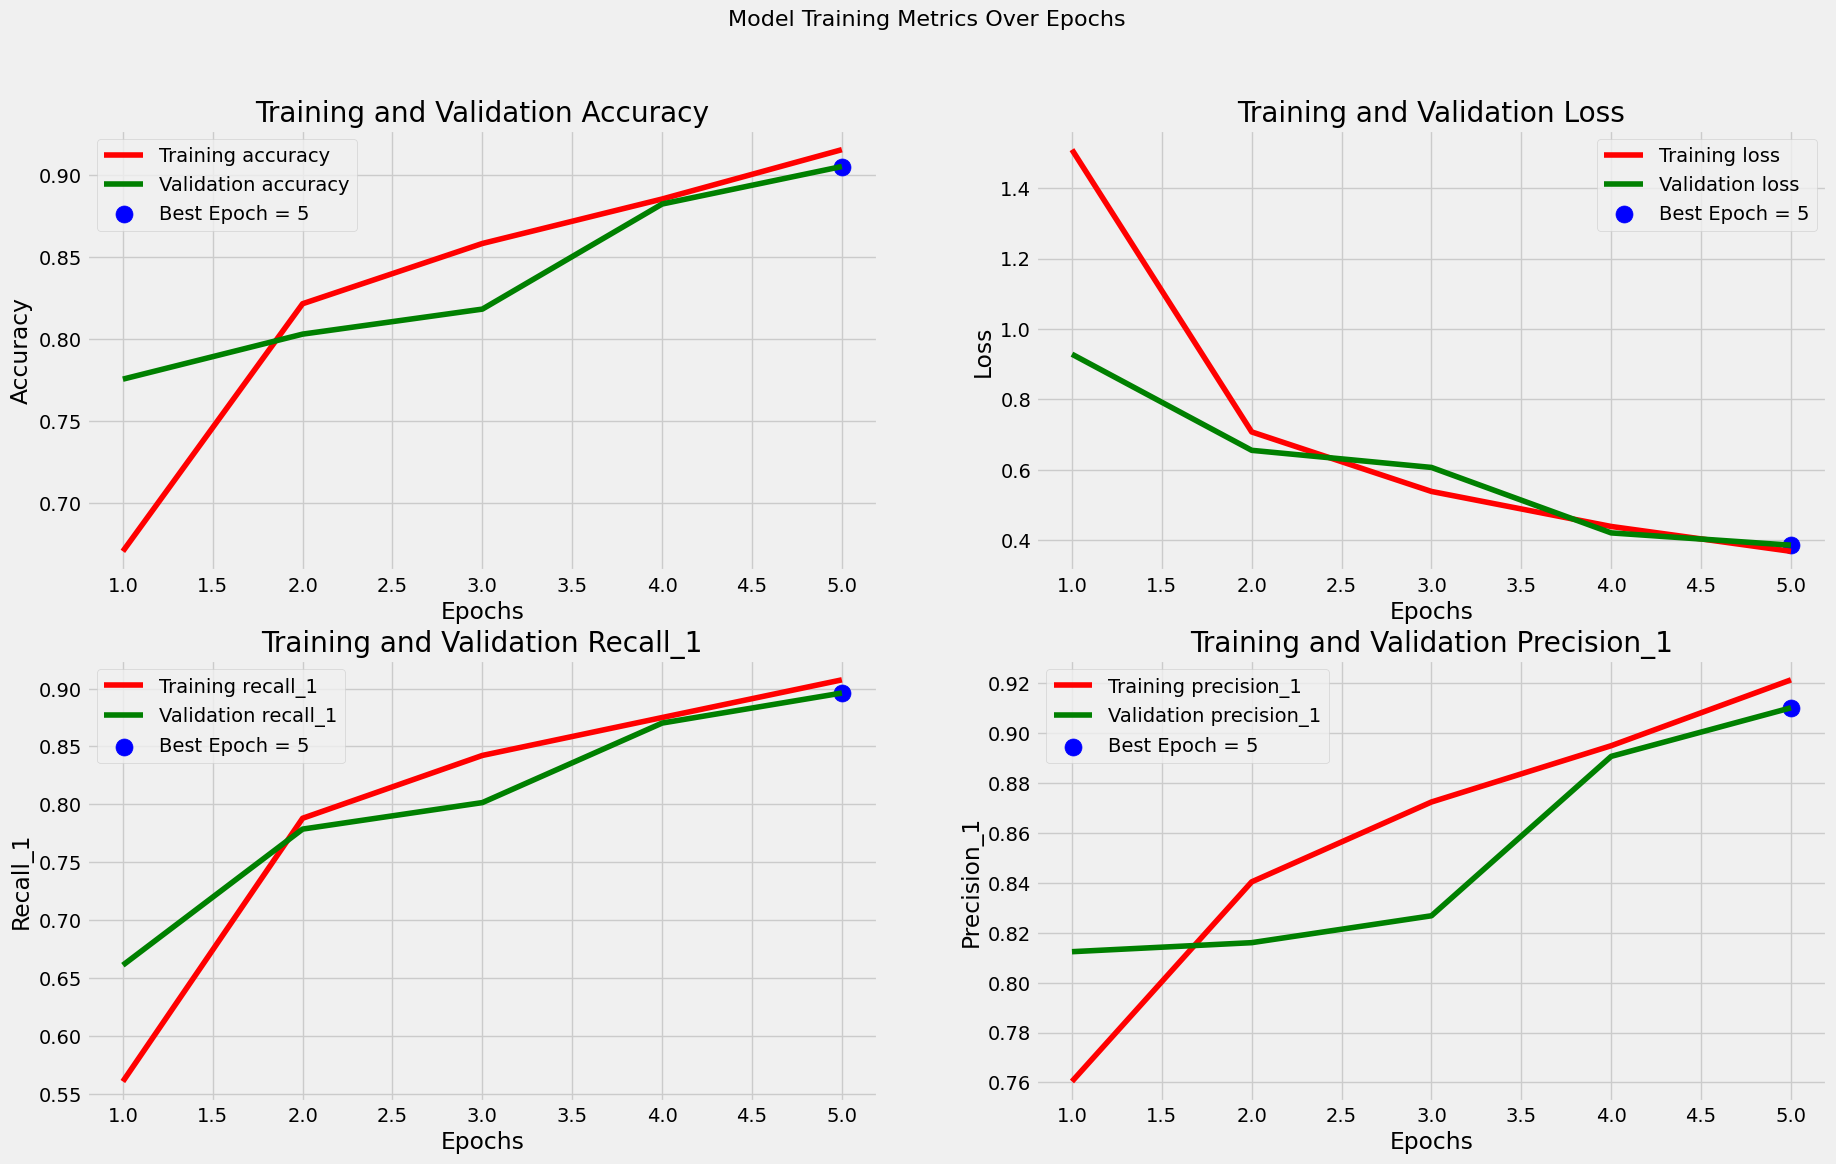

In [35]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'recall_1', 'precision_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [36]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f'Training Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValidation Accuracy: {valid_score[1]*100:.2f}')
print(f'Validation Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}')
print(f'Test Loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.9542 - loss: 0.2961 - precision_1: 0.9575 - recall_1: 0.9475
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9207 - loss: 0.3742 - precision_1: 0.9228 - recall_1: 0.9146
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9375 - loss: 0.3644 - precision_1: 0.9333 - recall_1: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9332 - loss: 0.3490 - precision_1: 0.9334 - recall_1: 0.9155
Training Accuracy: 95.06%
Train Loss: 0.2969


Validation Accuracy: 90.69
Validation Loss: 0.3858


Test Accuracy: 93.45
Test Loss: 0.3496


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


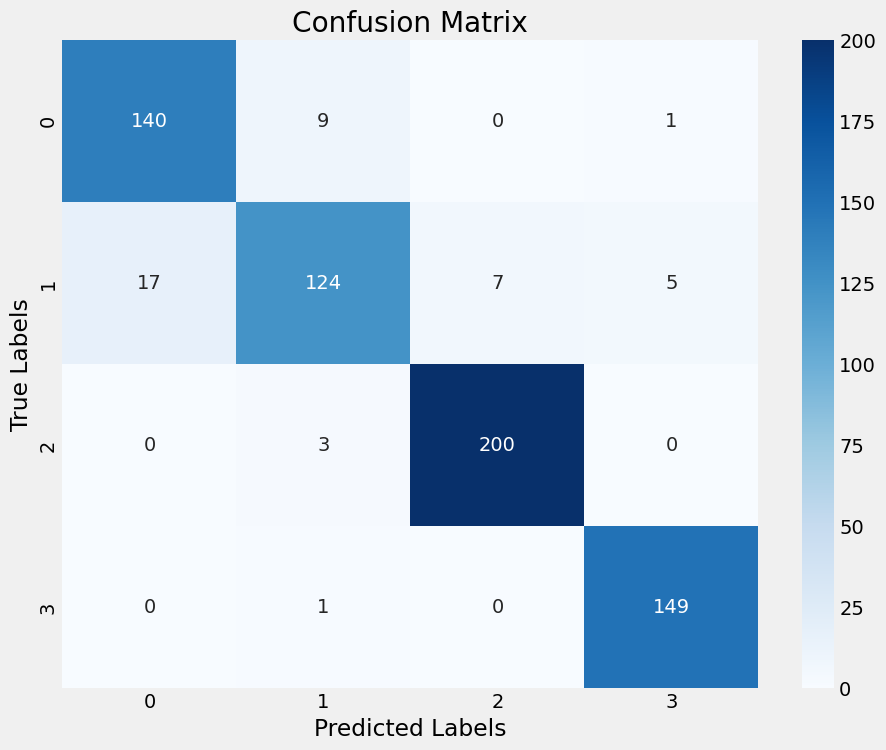

In [37]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [38]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       150
           1       0.91      0.81      0.86       153
           2       0.97      0.99      0.98       203
           3       0.96      0.99      0.98       150

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



In [39]:
cnn_model.save("cnn_model.h5")

In [1]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [2]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [3]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system('streamlit run /content/app.py --server.port 8501')

In [4]:
%%writefile app.py
import streamlit as st

st.title('Brain Tumor Classification')

st.write("Upload an image of a brain MRI scan to classify")

Writing app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url